In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [0]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
weather_data_cases = pd.read_csv('https://raw.githubusercontent.com/kakumanu-sudhir/learning_lab/master/covid19/dataset/weather_data_countries_covid19.csv')

In [0]:
# we are going to look at country wise data, hence sum up all the cities of that country into one row
confirmed_cases = confirmed_cases.groupby(['Country/Region'],as_index = False).sum().drop(["Lat","Long"],axis=1)
deaths_cases = deaths_cases.groupby(['Country/Region'],as_index = False).sum().drop(["Lat","Long"],axis=1)

In [232]:
confirmed_cases.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,Albania,0,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,Algeria,0,0,0,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,Andorra,0,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,Angola,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8


In [0]:
def get_unique_countries(df):
  locations_master = df['Country/Region'].sort_values().unique()
  return list(locations_master)


In [234]:
print("unique list of confirmed cases: {}\nlength: {} ".format(get_unique_countries(confirmed_cases), len(get_unique_countries(confirmed_cases))))

unique list of confirmed cases: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Icelan

In [235]:
# check if any country is missed in weather and remove that country for confirmed cases
print("missing countries in cases data: {} ".format(confirmed_cases[~confirmed_cases['Country/Region'].isin(weather_data_cases['Country/Region'])]['Country/Region'].to_list()))
confirmed_cases = confirmed_cases[confirmed_cases['Country/Region'].isin(weather_data_cases['Country/Region'])]

print("list of confirmed cases: {}\nshape {} ".format(confirmed_cases['Country/Region'].to_list(), confirmed_cases.shape))
print("unique list of confirmed cases: {}\nlength: {} ".format(get_unique_countries(confirmed_cases), len(get_unique_countries(confirmed_cases))))

missing countries in cases data: ['Czechia', 'Eswatini'] 
list of confirmed cases: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'H

In [236]:
weather_data_cases.head()

,Country/Region,weather_param,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,Afghanistan,maxtempC,-1,-3,0,0,-1,-1,-2,-3,...,10,12,14,15,16,14,15,8,6,10
1,Afghanistan,mintempC,-12,-13,-9,-8,-10,-8,-9,-12,...,8,5,8,5,8,7,5,5,3,2
2,Afghanistan,humidity,65,59,71,79,64,66,59,56,...,68,78,63,61,47,46,54,83,92,66
3,Albania,maxtempC,11,14,15,12,14,13,12,13,...,9,7,15,16,13,14,16,19,17,6
4,Albania,mintempC,6,6,6,3,7,2,7,5,...,5,3,3,7,6,6,8,8,9,4


In [237]:
print(confirmed_cases.shape)
print(weather_data_cases.shape)

(178, 72)
(534, 73)


In [0]:
weather_data_df_maxtemp = weather_data_cases.loc[weather_data_cases['weather_param'] == 'maxtempC']
weather_data_df_mintemp = weather_data_cases.loc[weather_data_cases['weather_param'] == 'mintempC']
weather_data_df_humidity = weather_data_cases.loc[weather_data_cases['weather_param'] == 'humidity']

weather_data_df_maxtemp = weather_data_df_maxtemp.groupby(['Country/Region']).sum()
weather_data_df_mintemp = weather_data_df_mintemp.groupby(['Country/Region']).sum()
weather_data_df_humidity = weather_data_df_humidity.groupby(['Country/Region']).sum()

In [239]:
print(weather_data_df_maxtemp.shape)
print(weather_data_df_mintemp.shape)
print(weather_data_df_humidity.shape)

(178, 71)
(178, 71)
(178, 71)


In [0]:
cols = confirmed_cases.keys()
# print(cols, cols[1:-1])

In [0]:
confirmed = confirmed_cases.loc[:, cols[1:-1]]
deaths = deaths_cases.loc[:, cols[1:-1]]
confirmed = confirmed.set_index(confirmed_cases['Country/Region'])
deaths = deaths.set_index(deaths_cases['Country/Region'])

In [0]:
confirmed_cases1 = confirmed_cases.groupby(['Country/Region']).sum()

In [0]:
country_confirmed_cases = confirmed_cases1.sum(axis=1).reset_index(name ='Total_Confirmed_Cases').style.background_gradient(cmap='Wistia')

In [244]:
Country_Confirmed_cases

,Country/Region,Total_Confirmed_Cases
0,Afghanistan,1462
1,Albania,2491
2,Algeria,5675
3,Andorra,3177
4,Angola,56
5,Antigua and Barbuda,68
6,Argentina,7583
7,Armenia,4670
8,Australia,41010
9,Austria,95532


In [0]:
china_cases = confirmed_cases1.loc['China'].to_numpy()
italy_cases = confirmed_cases1.loc['Italy'].to_numpy()
us_cases = confirmed_cases1.loc['US'].to_numpy()
india_cases = confirmed_cases1.loc['India'].to_numpy()

In [0]:
china_maxtemp = weather_data_df_maxtemp.loc['China'].to_numpy()
italy_maxtemp = weather_data_df_maxtemp.loc['Italy'].to_numpy()
us_maxtemp = weather_data_df_maxtemp.loc['US'].to_numpy()
india_maxtemp = weather_data_df_maxtemp.loc['India'].to_numpy()

china_humidity = weather_data_df_humidity.loc['China'].to_numpy()
italy_humidity = weather_data_df_humidity.loc['Italy'].to_numpy()
us_humidity = weather_data_df_humidity.loc['US'].to_numpy()
india_humidity = weather_data_df_humidity.loc['India'].to_numpy()

china_mintemp = weather_data_df_mintemp.loc['China'].to_numpy()
italy_mintemp = weather_data_df_mintemp.loc['Italy'].to_numpy()
us_mintemp = weather_data_df_mintemp.loc['US'].to_numpy()
india_mintemp = weather_data_df_mintemp.loc['India'].to_numpy()

In [0]:
days = np.array([i for i in range(len(confirmed.keys()))]).reshape(-1, 1)

In [0]:
limit_start = 0
limit_end = len(days)

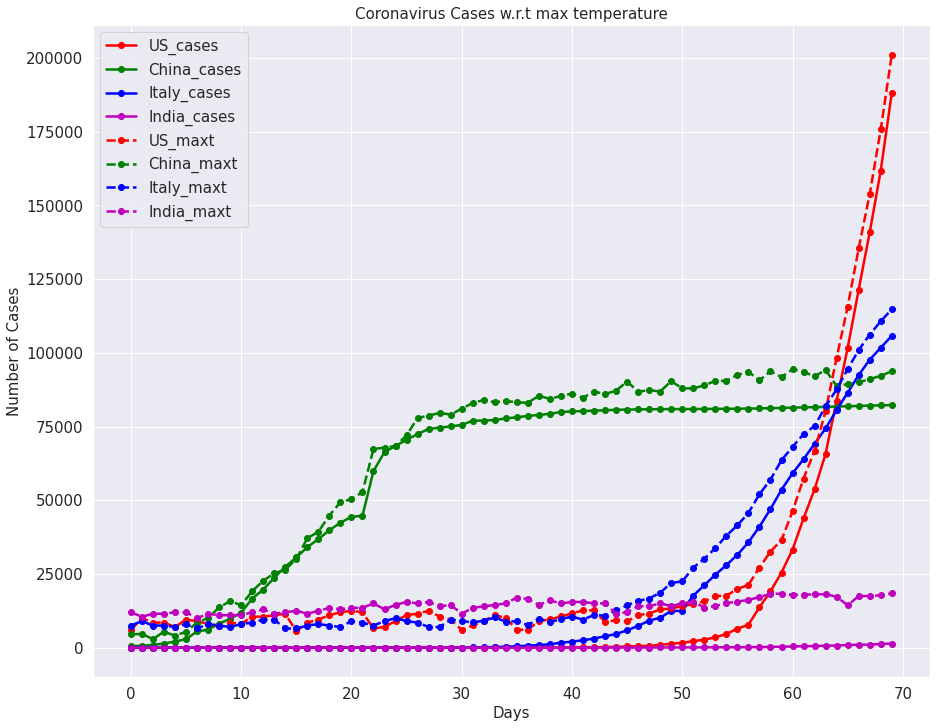

In [249]:
plt.figure(figsize=(15, 12))

plt.plot(days[limit_start:limit_end], us_cases[limit_start:limit_end], 'r-o')
plt.plot(days[limit_start:limit_end], china_cases[limit_start:limit_end], 'g-o')
plt.plot(days[limit_start:limit_end], italy_cases[limit_start:limit_end], 'b-o')
plt.plot(days[limit_start:limit_end], india_cases[limit_start:limit_end], 'm-o')

#Add a variation of the original cases with weather data, this is done to show a parallel curve along the original recorded cases
plt.plot(days[limit_start:limit_end], us_cases[limit_start:limit_end]+500+500*us_maxtemp[limit_start:limit_end], 'r--o')
plt.plot(days[limit_start:limit_end], china_cases[limit_start:limit_end]+500+500*china_maxtemp[limit_start:limit_end], 'g--o')
plt.plot(days[limit_start:limit_end], italy_cases[limit_start:limit_end]+500+500*italy_maxtemp[limit_start:limit_end], 'b--o')
plt.plot(days[limit_start:limit_end], india_cases[limit_start:limit_end]+500+500*india_maxtemp[limit_start:limit_end], 'm--o')

plt.title('Coronavirus Cases w.r.t max temperature', size=15)
plt.xlabel('Days', size=15)
plt.ylabel('Number of Cases', size=15)
plt.legend(['US_cases', 'China_cases', 'Italy_cases','India_cases', 'US_maxt', 'China_maxt', 'Italy_maxt', 'India_maxt'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

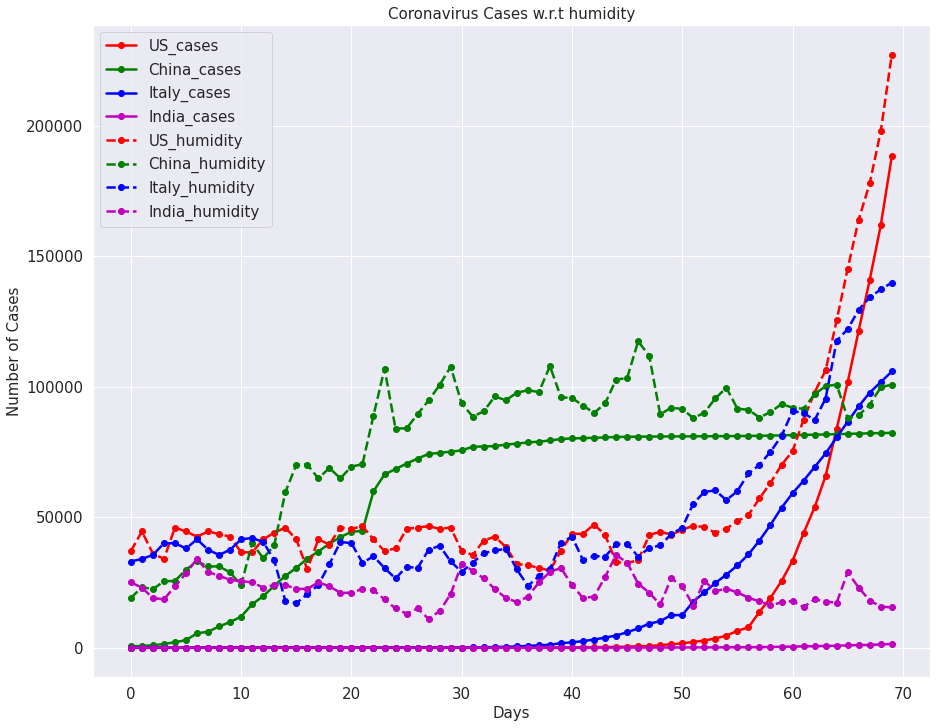

In [250]:
plt.figure(figsize=(15, 12))

plt.plot(days[limit_start:limit_end], us_cases[limit_start:limit_end], 'r-o')
plt.plot(days[limit_start:limit_end], china_cases[limit_start:limit_end], 'g-o')
plt.plot(days[limit_start:limit_end], italy_cases[limit_start:limit_end], 'b-o')
plt.plot(days[limit_start:limit_end], india_cases[limit_start:limit_end], 'm-o')

#Add a variation of the original cases with weather data, this is done to show a parallel curve along the original recorded cases
plt.plot(days[limit_start:limit_end], us_cases[limit_start:limit_end]+500+500*us_humidity[limit_start:limit_end], 'r--o')
plt.plot(days[limit_start:limit_end], china_cases[limit_start:limit_end]+500+500*china_humidity[limit_start:limit_end], 'g--o')
plt.plot(days[limit_start:limit_end], italy_cases[limit_start:limit_end]+500+500*italy_humidity[limit_start:limit_end], 'b--o')
plt.plot(days[limit_start:limit_end], india_cases[limit_start:limit_end]+500+500*india_humidity[limit_start:limit_end], 'm--o')

plt.title('Coronavirus Cases w.r.t humidity', size=15)
plt.xlabel('Days', size=15)
plt.ylabel('Number of Cases', size=15)
plt.legend(['US_cases', 'China_cases', 'Italy_cases','India_cases', 'US_humidity', 'China_humidity', 'Italy_humidity','India_humidity'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

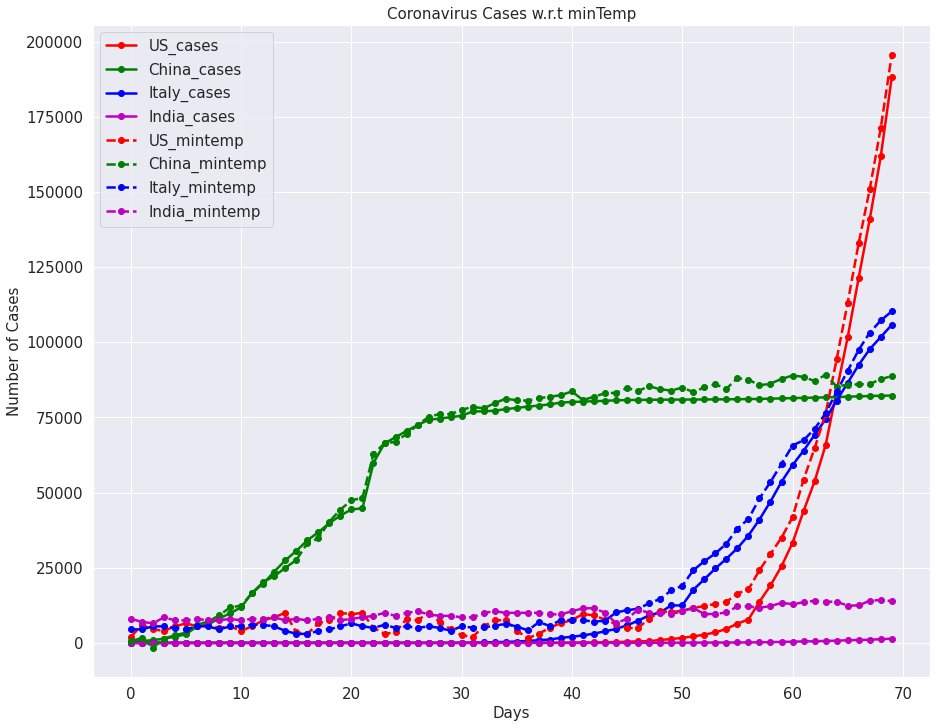

In [251]:
plt.figure(figsize=(15, 12))

plt.plot(days[limit_start:limit_end], us_cases[limit_start:limit_end], 'r-o')
plt.plot(days[limit_start:limit_end], china_cases[limit_start:limit_end], 'g-o')
plt.plot(days[limit_start:limit_end], italy_cases[limit_start:limit_end], 'b-o')
plt.plot(days[limit_start:limit_end], india_cases[limit_start:limit_end], 'm-o')

#Add a variation of the original cases with weather data, this is done to show a parallel curve along the original recorded cases
plt.plot(days[limit_start:limit_end], us_cases[limit_start:limit_end]+500+500*us_mintemp[limit_start:limit_end], 'r--o')
plt.plot(days[limit_start:limit_end], china_cases[limit_start:limit_end]+500+500*china_mintemp[limit_start:limit_end], 'g--o')
plt.plot(days[limit_start:limit_end], italy_cases[limit_start:limit_end]+500+500*italy_mintemp[limit_start:limit_end], 'b--o')
plt.plot(days[limit_start:limit_end], india_cases[limit_start:limit_end]+500+500*india_mintemp[limit_start:limit_end], 'm--o')

plt.title('Coronavirus Cases w.r.t minTemp', size=15)
plt.xlabel('Days', size=15)
plt.ylabel('Number of Cases', size=15)
plt.legend(['US_cases', 'China_cases', 'Italy_cases','India_cases', 'US_mintemp', 'China_mintemp', 'Italy_mintemp','India_mintemp'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()